In [3]:
%load_ext pycodestyle_magic
%flake8_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

## Introduction 
In this notebook we will be using the famous titanic datasets and perform machine learning ( supervised learning ) to predict either the person survive or not

## What will we accomplish?
By the end of the notebook:
1. Trainee will understand the overall process of creating machine learning model
2. Trainee will learn how to make model for titanic dataset

## Notebook Content
* [Part 1 : Data Exploration](#getdata)
* [Part 2 : Data Preparation ](#preparedata)
* [Part 3 : Model training ](#model)

The notebook start here 

Importing all the needed libraries 

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

###  <a name="getdata">Getting data and its information

The titanic dataset is one of the famous data set for supervised learning and the data is available at: https://www.kaggle.com/c/titanic/data?select=gender_submission.csv 

In [36]:
x_train = pd.read_csv('../data/titanic_train.csv')
x_test = pd.read_csv('../data/titanic_test.csv')

In [6]:
x_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
x_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

The dictonary for the column is available at : https://www.kaggle.com/c/titanic/data?select=gender_submission.csv 

From overall analysis we know that some of the columns will not effect the survival of a person which later we will remove if needed

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we will look at the data type, and its non null count which we will use it later during preparing the data.

Since we know there is null in the dataset, we will look at the percentage of the null value for each column 

In [37]:
total = x_train.isnull().sum().sort_values(ascending=False)
percent = x_train.isnull().sum()/x_train.isnull().count()*100
percent_rounded = (round(percent, 1)).sort_values(ascending=False)
missing = pd.concat([total, percent_rounded], axis=1, keys=['Total', '%'])
missing.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


From this analysis we know that cabin account for have a lot of missing data (71%) which needed to be addreses and age which is 19.9% and lastly embarked 0.2% and these low number missing data will be easier to handle later durig cleaning. 

#### Starting from here we will go through some of the important data that might have effect on the survivability of the person

Visually view what is the relation between gender/sex to thier chance of survival 

KeyError: 'Sex'

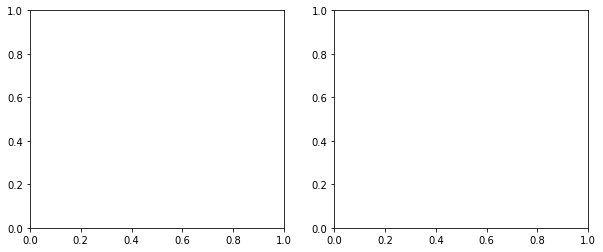

In [100]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = x_train[x_train['Sex'] == 'female']
men = x_train[x_train['Sex'] == 'male']
ax = sns.histplot(
    women[women['Survived'] == 1].Age.dropna(), color="red",
    bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.histplot(
    women[women['Survived'] == 0].Age.dropna(),
    bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(
    men[men['Survived'] == 1].Age.dropna(), color="red",
    bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.histplot(
    men[men['Survived'] == 0].Age.dropna(), bins=40,
    label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

Here we can observe that the survival of female is higher than male. For male we can observe that male from age 0-10 (kid) is the only region that the number of survied is higher than not survived in the male section. This can be assume that because during evacuation they are prioritizing childern and women.

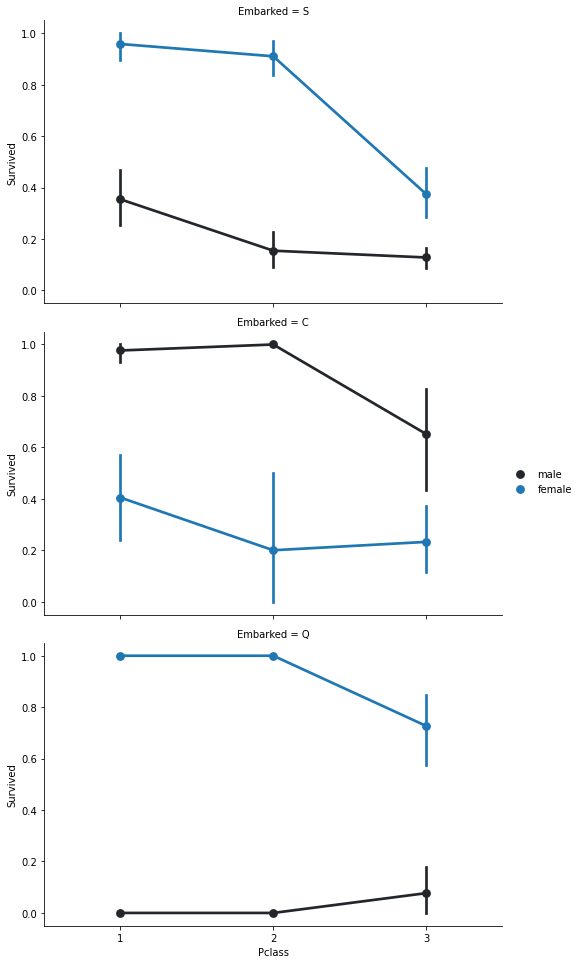

In [46]:
FacetGrid = sns.FacetGrid(x_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',
              palette=None,  order=None, hue_order=None)
FacetGrid.add_legend()

Here we can observe the Embarked influenced the survial of the passenger depending on the gender and the Pclass of the person.The first observeable aspect is women from both port Q and S  have higher chance to survial compared to men but it opposite for the port C. The class also influnced the survival rate as we will see better later.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

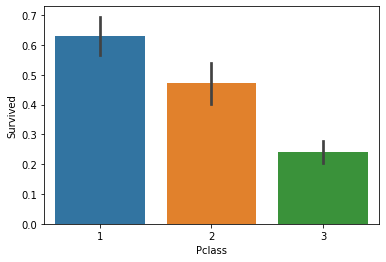

In [12]:
sns.barplot(x='Pclass', y='Survived', data=x_train)

So here we it clearly observed that passenger from Pclass 1 will have better chance to survive than other class.

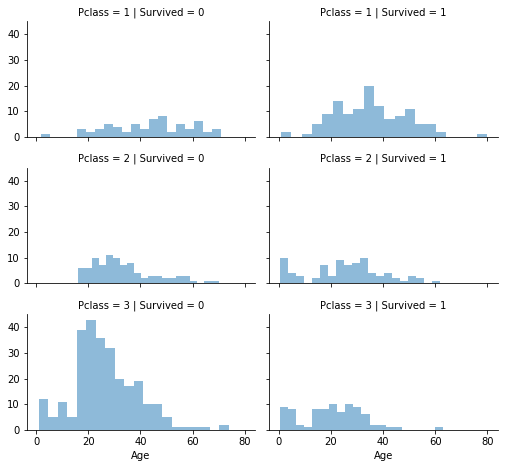

In [48]:
grid = sns.FacetGrid(x_train, col='Survived',
                     row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Here we can a detailed view of the impact of Pclass on the survival of the pessanger and from this view we can observe the wide diffrent better Pclass 3 and Pclass 1

Since both SibSp and Parch can be in the same category which is relatives so we will combine the data to make our data easier to analyzed  

In [50]:
data = [x_train, x_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

Here we will observe how having relatives effect the passenger survivability 

<AxesSubplot:xlabel='relatives', ylabel='Survived'>

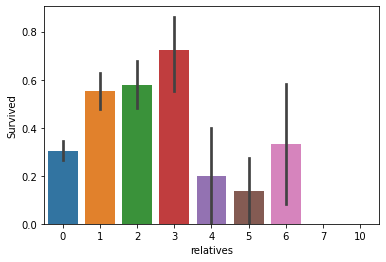

In [15]:
sns.barplot(x='relatives', y='Survived', data=x_train)

Here we know that having 1 to 3 person relatives have better chance of survival compared to other , this can be deducted by assuming that passenger with higher number of relatives will take more time to evacuate and for people with no relatives will be hard to evacuate as they will have less help during evacuation 

###  <a name="preparedata">Preparing Data

In this section we will do necesarry process to prepare the data for the training.

Below we fill in the null data in fare and age with 0 to be prepared for the next step

In [16]:
data = [x_test, x_train]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].fillna(0)

Here we create age bands and see its correlation with the survival 

In [91]:
x_train['AgeBand'] = pd.cut(x_train['Age'], 5)
x_train[['AgeBand', 'Survived']].groupby(
    ['AgeBand'], as_index=False).mean().sort_values(
    by='AgeBand', ascending=True)

KeyError: "['Survived'] not in index"

From the age band we obsrve that it is possible to use this instead of just Age, so we create ordinal based on the band and drop the Age. This is done to reduce the complexity of the data and get better accuracy 

In [70]:
data = [x_train, x_test]
for dataset in data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
x_train = x_train.drop(['AgeBand'], axis=1)

KeyError: "['AgeBand'] not found in axis"

We use the same method from the age on fare , wher we create a fare band and drop the fare 

In [90]:
x_train['FareBand'] = pd.qcut(x_train['Fare'], 4)
x_train[['FareBand', 'Survived']].groupby(
    ['FareBand'], as_index=False).mean().sort_values(
    by='FareBand', ascending=True)

ValueError: Bin edges must be unique: array([0., 0., 0., 0., 0.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [87]:
data = [x_train, x_test]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[
        (dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[
        (dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare']

x_train = x_train.drop(['FareBand'], axis=1)

KeyError: "['FareBand'] not found in axis"

Then we will drop some redundent data such as cabin which is correlated with the fare and SibSp and Parch which we already merge as relatives

In [74]:
x_train = x_train.drop(['Cabin', 'SibSp', 'Parch'], axis=1)
x_test = x_test.drop(['Cabin', 'SibSp', 'Parch'], axis=1)

Next we will handle the missing data in Embarked by inserting the highest frequency value 

In [22]:
x_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Here we know that the highest frequency value is 'S'. So we will subtitue the null value with 'S'

In [23]:
common_value = 'S'
data = [x_train, x_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

Before we continue , now we are expecting no null value.

In [24]:
x_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
relatives      0
dtype: int64

In [25]:
x_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
relatives      0
dtype: int64

Drop unnecesarry column

In [76]:
x_train = x_train.drop(['Ticket', 'Name', 'PassengerId'], axis=1)
x_test = x_test.drop(['Ticket', 'Name', 'PassengerId'], axis=1)

Split the data for the output and input

In [75]:
y_train = x_train['Survived']
y_test = pd.read_csv('../data/titanic_test_result.csv')
y_test = y_test['Survived']

In [77]:
x_train = x_train.drop(['Survived'], axis=1)

Hot encoding for the categorical data that we have which is 'Sex' and 'Embarked'

In [78]:
x_train = pd.get_dummies(x_train, columns=['Sex', 'Embarked'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Sex', 'Embarked'], drop_first=True)

### <a name="model"> Model Training 

In this section we will start our training and our measure is the accuracy of our model which we will use the test data to get the model accuracy. These models's accuracy are compared and the results are open for discussion.

The model that we are using is:
1. Logistic regression
2. Support vector machines
3. K Nearest Neighbours 
4. Random Forest
5. Decision Tree

#### Logistic regression

In [80]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(x_train, y_train)
logistic_prediction = logreg.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
print(logistic_accuracy)
print(confusion_matrix(y_test, logistic_prediction))
print(classification_report(y_test, logistic_prediction))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Support vector machines

In [81]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_prediction = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_prediction)
print(svm_accuracy)
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### K Nearest Neighbours

In [82]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_prediction)
print(knn_accuracy)
print(confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Random Forest

In [83]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
rf_prediction = random_forest.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(rf_accuracy)
print(confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test, rf_prediction))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#### Decision Tree

In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dt_prediction = decision_tree.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_prediction)
print(dt_accuracy)
print(confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test, dt_prediction))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Overall model comparison

In [85]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree'],
    'Score': [svm_accuracy, knn_accuracy, logistic_accuracy,
              rf_accuracy, dt_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,1.000000
2,Logistic Regression,0.952153
1,KNN,0.820574
3,Random Forest,0.799043
4,Decision Tree,0.799043


Here we observe that the SVM model is the perfect model for our prediction 